# Telco Customers Chrun dataset

* Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


Dataset-https://www.kaggle.com/datasets/blastchar/telco-customer-churn



Here 'Yes' in Churn refers to those who have left their membership...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

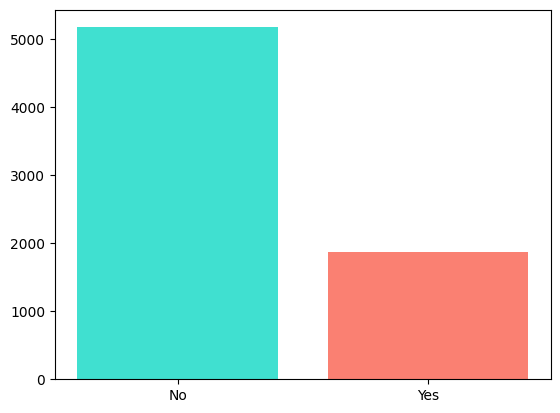

In [ ]:
plt.bar(data.Churn.value_counts().index,data.Churn.value_counts(),color=['turquoise','salmon']);

In [ ]:
from sklearn.utils import resample
data_majority=data[data.Churn=='No']
data_minority=data[data.Churn=='Yes']

data_minority_unsample=resample(data_minority,replace=True,n_samples=len(data_majority),random_state=42)

data_unsample=pd.concat([data_majority,data_minority_unsample])

In [ ]:
data_unsample['Churn'].value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [ ]:
len(data_unsample),len(data)

(10348, 7043)

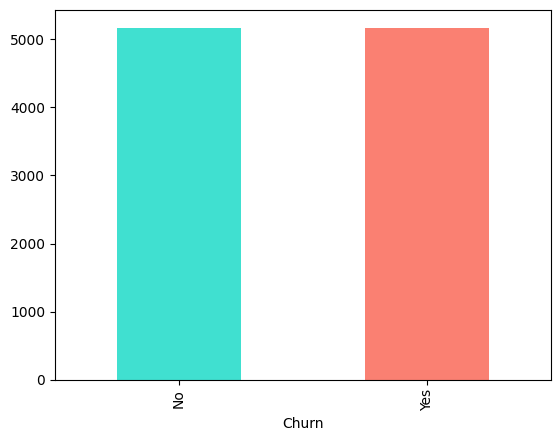

In [ ]:
data_unsample['Churn'].value_counts().plot(kind='bar',color=['turquoise','salmon']);

In [ ]:
data_unsample.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data_unsample.T

,0,1,3,6,7,9,10,11,12,14,...,4546,27,2822,4928,5553,6757,4851,2567,2054,5759
customerID,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,...,5520-FVEWJ,8665-UTDHZ,9170-GYZJC,2718-GAXQD,6629-CZTTH,5294-CDGWY,2055-PDADH,0407-BDJKB,9734-UYXQI,9985-MWVIX
gender,Female,Male,Male,Male,Female,Male,Male,Male,Male,Male,...,Female,Male,Female,Female,Male,Male,Female,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Partner,Yes,No,No,No,No,No,Yes,No,Yes,No,...,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No
Dependents,No,No,No,Yes,No,Yes,Yes,No,No,No,...,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No
tenure,1,34,45,22,10,62,13,16,58,25,...,12,1,41,4,1,51,3,60,2,1
PhoneService,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No phone service,Yes,No phone service,No,No,No,Yes,No,...,Yes,No phone service,Yes,No,No,No phone service,No,Yes,Yes,No
InternetService,DSL,DSL,DSL,Fiber optic,DSL,DSL,DSL,No,Fiber optic,Fiber optic,...,Fiber optic,DSL,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,No,Yes,Yes,Yes,No internet service,No,Yes,...,No,No,Yes,No,No,Yes,No,No,No,No


In [ ]:
data_unsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10348 non-null  object 
 1   gender            10348 non-null  object 
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  object 
 4   Dependents        10348 non-null  object 
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  object 
 7   MultipleLines     10348 non-null  object 
 8   InternetService   10348 non-null  object 
 9   OnlineSecurity    10348 non-null  object 
 10  OnlineBackup      10348 non-null  object 
 11  DeviceProtection  10348 non-null  object 
 12  TechSupport       10348 non-null  object 
 13  StreamingTV       10348 non-null  object 
 14  StreamingMovies   10348 non-null  object 
 15  Contract          10348 non-null  object 
 16  PaperlessBilling  10348 non-null  object 
 17 

In [ ]:
data_unsample.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,10348.000000,10348.000000,10348.000000
mean,0.192888,27.711055,67.661625
std,0.394585,24.125245,28.790925
min,0.000000,0.000000,18.250000
25%,0.000000,5.000000,45.300000
50%,0.000000,21.000000,74.400000
75%,0.000000,49.000000,90.600000
max,1.000000,72.000000,118.750000


In [ ]:
data_unsample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [ ]:
data_unsample['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             4276
Mailed check                 2157
Bank transfer (automatic)    2006
Credit card (automatic)      1909
Name: count, dtype: int64

In [ ]:
data_unsample['Contract'].value_counts()

Contract
Month-to-month    6808
Two year          1781
One year          1759
Name: count, dtype: int64

In [ ]:
data_unsample['gender'].value_counts()

gender
Male      5263
Female    5085
Name: count, dtype: int64

In [ ]:
data_unsample['MultipleLines'].value_counts()

MultipleLines
No                  4836
Yes                 4521
No phone service     991
Name: count, dtype: int64

In [ ]:
data_unsample['InternetService'].value_counts()

InternetService
Fiber optic    5371
DSL            3247
No             1730
Name: count, dtype: int64

In [ ]:
data_dic={'Yes':1,'No':0}
gender_dic1={'Male':1,'Female':0}
MultipleLines_dic2={'No phone service':0,'No':1,'Yes':2}
Internet_dicr={'Fiber optic':0,'DSL':1,'No':2}
Contract_dicr={'Month-to-month':0,'One year':1,'Two year':2}
PaymentMethod_dicr={'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}

In [ ]:
data_unsample['gender']=data_unsample['gender'].map(gender_dic1)

In [ ]:
columns_NOservice=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for i in columns_NOservice:
  data_unsample[i]=data_unsample[i].map(MultipleLines_dic2)

In [ ]:
data_unsample['InternetService']=data_unsample['InternetService'].map(Internet_dicr)

In [ ]:
columns=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

for i in columns:
  data_unsample[i]=data_unsample[i].map(data_dic)

In [ ]:
data_unsample['Contract']=data_unsample['Contract'].map(Contract_dicr)
data_unsample['PaymentMethod']=data_unsample['PaymentMethod'].map(PaymentMethod_dicr)

In [ ]:
data_unsample

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,1.0,...,1.0,1.0,1.0,1.0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2.0,...,2.0,1.0,1.0,1.0,1,0,1,56.95,1889.5,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,2.0,...,2.0,2.0,1.0,1.0,1,0,2,42.30,1840.75,0
6,1452-KIOVK,1,0,0,1,22,1,2,0,1.0,...,1.0,1.0,2.0,1.0,0,1,3,89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,2.0,...,1.0,1.0,1.0,1.0,0,0,1,29.75,301.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,5294-CDGWY,1,0,1,1,51,0,0,1,2.0,...,2.0,1.0,2.0,2.0,1,0,0,59.30,3014.65,1
4851,2055-PDADH,0,1,0,0,3,1,1,0,1.0,...,1.0,1.0,1.0,1.0,0,1,0,70.40,204.7,1
2567,0407-BDJKB,1,0,1,0,60,1,2,0,1.0,...,2.0,1.0,2.0,1.0,0,1,0,95.75,5742.9,1
2054,9734-UYXQI,0,0,0,0,2,1,2,1,1.0,...,1.0,1.0,1.0,1.0,0,1,0,49.40,106.55,1


In [ ]:
data_unsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10348 non-null  object 
 1   gender            10348 non-null  int64  
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  int64  
 4   Dependents        10348 non-null  int64  
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  int64  
 7   MultipleLines     10348 non-null  int64  
 8   InternetService   10348 non-null  int64  
 9   OnlineSecurity    8618 non-null   float64
 10  OnlineBackup      8618 non-null   float64
 11  DeviceProtection  8618 non-null   float64
 12  TechSupport       8618 non-null   float64
 13  StreamingTV       8618 non-null   float64
 14  StreamingMovies   8618 non-null   float64
 15  Contract          10348 non-null  int64  
 16  PaperlessBilling  10348 non-null  int64  
 17 

In [ ]:
for i in data_unsample.columns:
  if data_unsample[i].dtype=='object':
    print(i)

customerID
TotalCharges


In [ ]:
data_unsample.TotalCharges[0]

'29.85'

In [ ]:
for i in data_unsample.columns:
  if data_unsample[i].dtype=='object':
    data_unsample[i]=pd.to_numeric(data_unsample[i],errors='coerce')

In [ ]:
data_unsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      float64
 1   gender            10348 non-null  int64  
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  int64  
 4   Dependents        10348 non-null  int64  
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  int64  
 7   MultipleLines     10348 non-null  int64  
 8   InternetService   10348 non-null  int64  
 9   OnlineSecurity    8618 non-null   float64
 10  OnlineBackup      8618 non-null   float64
 11  DeviceProtection  8618 non-null   float64
 12  TechSupport       8618 non-null   float64
 13  StreamingTV       8618 non-null   float64
 14  StreamingMovies   8618 non-null   float64
 15  Contract          10348 non-null  int64  
 16  PaperlessBilling  10348 non-null  int64  
 17 

In [ ]:
for i in data_unsample.columns:
  if data_unsample[i].isnull:
    data_unsample[i]=data_unsample[i].fillna(data_unsample[i].mean())

In [ ]:
data_unsample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        0 non-null      float64
 1   gender            10348 non-null  int64  
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  int64  
 4   Dependents        10348 non-null  int64  
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  int64  
 7   MultipleLines     10348 non-null  int64  
 8   InternetService   10348 non-null  int64  
 9   OnlineSecurity    10348 non-null  float64
 10  OnlineBackup      10348 non-null  float64
 11  DeviceProtection  10348 non-null  float64
 12  TechSupport       10348 non-null  float64
 13  StreamingTV       10348 non-null  float64
 14  StreamingMovies   10348 non-null  float64
 15  Contract          10348 non-null  int64  
 16  PaperlessBilling  10348 non-null  int64  
 17 

In [ ]:
data_unsample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0,0,1,0,1,0,0,1,1.0,...,1.0,1.0,1.0,1.0,0,1,0,29.85,29.85,0
1,NaN,1,0,0,0,34,1,1,1,2.0,...,2.0,1.0,1.0,1.0,1,0,1,56.95,1889.50,0
3,NaN,1,0,0,0,45,0,0,1,2.0,...,2.0,2.0,1.0,1.0,1,0,2,42.30,1840.75,0
6,NaN,1,0,0,1,22,1,2,0,1.0,...,1.0,1.0,2.0,1.0,0,1,3,89.10,1949.40,0
7,NaN,0,0,0,0,10,0,0,1,2.0,...,1.0,1.0,1.0,1.0,0,0,1,29.75,301.90,0


In [ ]:
data_unsample=data_unsample.drop('customerID',axis=1)

In [ ]:
data_unsample.boxplot(column=['MonthlyCharges'],by='Churn');

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
|X=data_unsample.drop('Churn',axis=1)
Y=data_unsample['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
clf_llr=LogisticRegression()
clf_dtc=DecisionTreeClassifier()
clf_rfc=RandomForestClassifier()
clf_knn=KNeighborsClassifier()
clf_svc=SVC()
clf_gnb=GaussianNB()
clf_gbc=GradientBoostingClassifier()
clf_adc=AdaBoostClassifier()
clf_bagc=BaggingClassifier()

In [ ]:
clf_llr.fit(X_train,Y_train)
clf_rfc.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
clf_gnb.fit(X_train,Y_train)
clf_dtc.fit(X_train,Y_train)
clf_svc.fit(X_train,Y_train)
clf_gbc.fit(X_train,Y_train)
clf_adc.fit(X_train,Y_train)
clf_bagc.fit(X_train,Y_train)

BaggingClassifier()

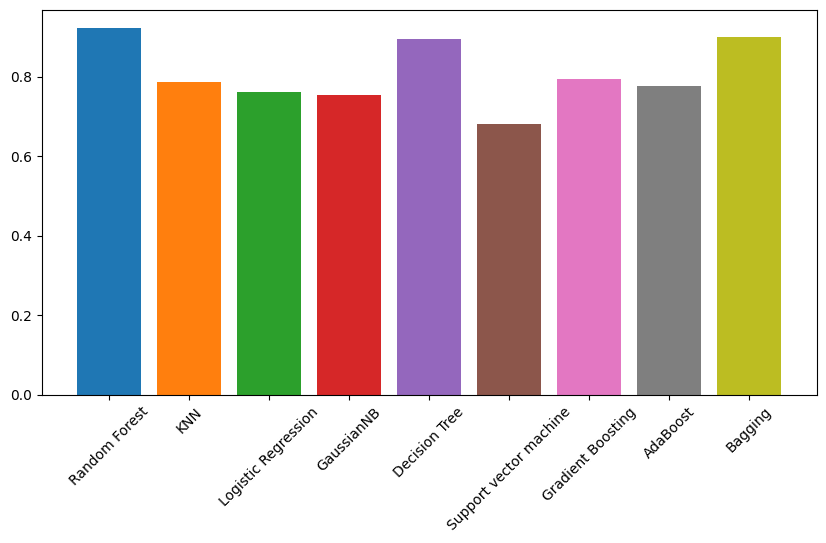

In [ ]:
plt.figure(figsize=(10,5))
plt.bar("Random Forest",clf_rfc.score(X_test,Y_test))
plt.bar("KNN",clf_knn.score(X_test,Y_test))
plt.bar("Logistic Regression",clf_llr.score(X_test,Y_test))
plt.bar("GaussianNB",clf_gnb.score(X_test,Y_test))
plt.bar("Decision Tree",clf_dtc.score(X_test,Y_test))
plt.bar("Support vector machine",clf_svc.score(X_test,Y_test))
plt.bar("Gradient Boosting",clf_gbc.score(X_test,Y_test))
plt.bar("AdaBoost",clf_adc.score(X_test,Y_test))
plt.bar("Bagging",clf_bagc.score(X_test,Y_test))
plt.xticks(rotation=45);

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_randomcv=RandomizedSearchCV(estimator=clf_rfc,param_distributions=param_grid,n_iter=25,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [ ]:
rf_randomcv.score(X_test,Y_test)

0.9299516908212561

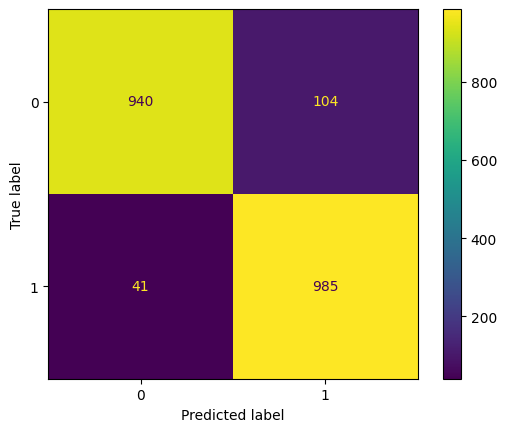

In [ ]:
cm=confusion_matrix(Y_test,rf_randomcv.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_rfc.classes_).plot();

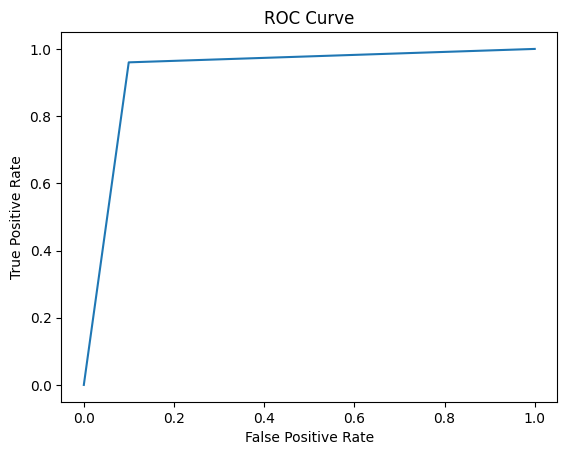

In [ ]:
fpr,tpr,thresholds=roc_curve(Y_test,rf_randomcv.predict(X_test))
plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve');

In [ ]:
{"F1 Score":f1_score(Y_test,rf_randomcv.predict(X_test)),"Precision Score":precision_score(Y_test,rf_randomcv.predict(X_test)),"Recall Score":recall_score(Y_test,rf_randomcv.predict(X_test))}

{'F1 Score': 0.9314420803782506,
 'Precision Score': 0.9044995408631772,
 'Recall Score': 0.9600389863547758}

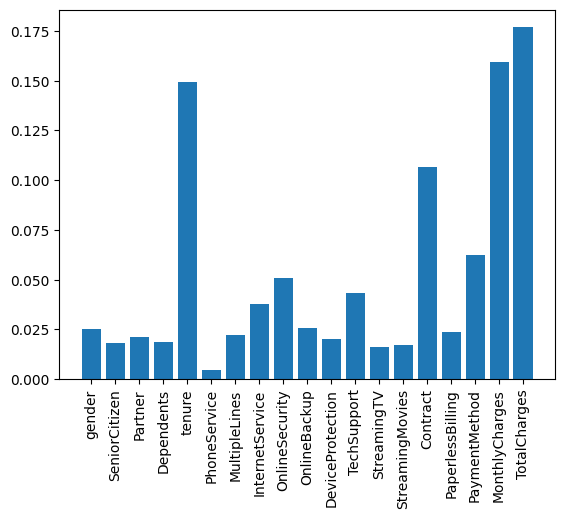

In [ ]:
plt.bar(X.columns,clf_rfc.feature_importances_)
plt.xticks(rotation=90);

In [ ]:
import pickle
pickle.dump(rf_randomcv,open('/content/drive/MyDrive/Churn/model.pkl','wb'))

# Next I want to deploy this model through Django or Flask either one of them.
